#Importing libraries and source datas

In [344]:
# import 'pandas' data analysis library
import pandas as pd

# import 'matplotlib' library's 'pyplot' interface for creating charts/plots
import matplotlib.pyplot as plt

# import 'numpy', a library for working with arrays
import numpy as np

# import chart style sheets
from matplotlib import style
# which style sheet to use
style.use('ggplot')

# import 'seaborn' data visualization library
import seaborn as sns

# import Windows sound playing module
import winsound

# import 'skew' and 'kurtosis' from 'scipy' library's 'stats' module
from scipy.stats import skew, kurtosis

# import Shapiro-Wilk (S-W) normality test
from scipy.stats import shapiro

# import function for coloring output
from termcolor import colored

# import probability Q-Q plot
from scipy.stats import probplot

# import Levene's test - testing the difference in the Variances of groups
from scipy.stats import levene

# import Student's t-test (2 independent samples) 
from scipy.stats import ttest_ind

# import Analysis of Variance (ANOVA) - One-way
from scipy.stats import f_oneway

# import 'train_test_split' function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# from 'sklearn' library's 'linear_model' module, import 'LinearRegression' class
from sklearn.linear_model import LinearRegression

# from 'sklearn' library's 'metrics' module, import 'mean_squared_error' function
from sklearn.metrics import mean_squared_error

In [345]:
inputfolderpath = r'C:\Users\dunca_n0wxpzg\Documents\Hobbi projekt\MovieMasters'
inputfile = 'Movies_more7rate.xlsx'
inputsheet = 'Films'
inputcolumns = 'A:O'

In [346]:
# import the table data from Excel
df = pd.read_excel(inputfolderpath + '\\' + inputfile, 
    sheet_name = inputsheet, 
    usecols = inputcolumns)
df.head()

,imdb_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,tt0805564,Lars and the Real Girl,106,2007,/co//dr//ro/,8.025118,7.1,12000000.0,11293663,Ryan Gosling,Emily Mortimer,Paul Schneider,Craig Gillespie,Nancy Oliver,Sidney Kimmel Entertainment
1,tt1022603,(500) Days of Summer,95,2009,/co//dr//ro/,16.376657,7.2,7500000.0,60722734,Joseph Gordon-Levitt,Zooey Deschanel,Chloë Grace Moretz,Marc Webb,Scott Neustadter,Fox Searchlight Pictures
2,tt1655442,The Artist,100,2011,/co//dr//ro/,11.440948,7.3,15000000.0,133432856,Jean Dujardin,Bérénice Bejo,John Goodman,Michel Hazanavicius,Michel Hazanavicius,France 3 Cinéma
3,tt1748122,Moonrise Kingdom,94,2012,/co//dr//ro/,8.692433,7.6,16000000.0,68263166,Bruce Willis,Edward Norton,Jared Gilman,Wes Anderson,Wes Anderson,Scott Rudin Productions
4,tt0817177,Flipped,89,2010,/dr//ro/,10.279685,7.4,14000000.0,1755212,Madeline Carroll,Callan McAuliffe,Rebecca De Mornay,Rob Reiner,Rob Reiner,Reiner / Greisman Productions


#Data preparation

In [347]:
# show data types of all columns
print(df.dtypes)

imdb_id                object
title                  object
duration_minutes        int64
year_released           int64
genres                 object
popularity            float64
average_rating        float64
production_cost       float64
box_office_revenue      int64
actor1                 object
actor2                 object
actor3                 object
director               object
writer                 object
production_company     object
dtype: object


In [348]:
# show descriptive statistics of all numerical columns
df.describe()

,duration_minutes,year_released,popularity,average_rating,production_cost,box_office_revenue
count,46.000000,46.000000,46.000000,46.000000,3.800000e+01,4.600000e+01
mean,113.760870,2011.804348,11.163871,7.415217,1.751380e+07,9.344857e+07
std,17.653687,3.236044,5.199343,0.252074,1.252169e+07,1.227723e+08
min,85.000000,2006.000000,0.195677,7.100000,8.000000e+03,2.232100e+04
25%,102.000000,2009.000000,8.238781,7.225000,8.750000e+06,6.685981e+06
50%,111.500000,2012.500000,10.607444,7.300000,1.450000e+07,5.050224e+07
75%,123.750000,2014.000000,12.545014,7.600000,2.575000e+07,1.216326e+08
max,166.000000,2016.000000,34.347590,8.000000,5.000000e+07,4.454357e+08


<Figure size 640x480 with 0 Axes>

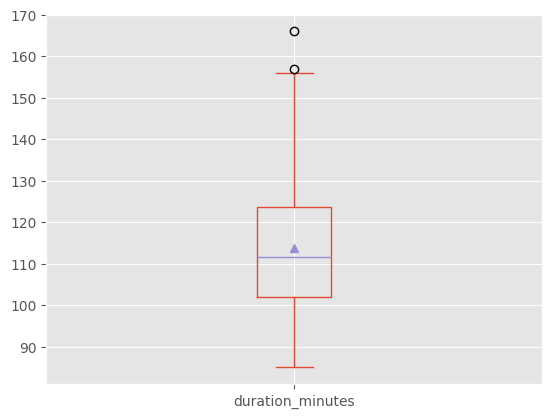

In [349]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'duration_minutes', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

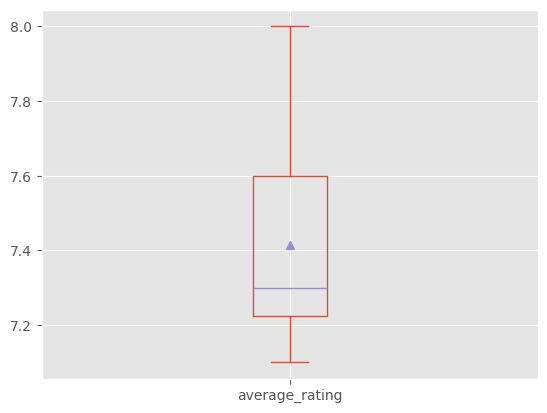

In [350]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'average_rating', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

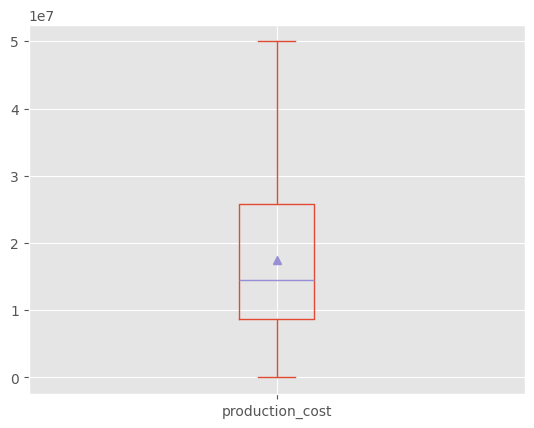

In [351]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'production_cost', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

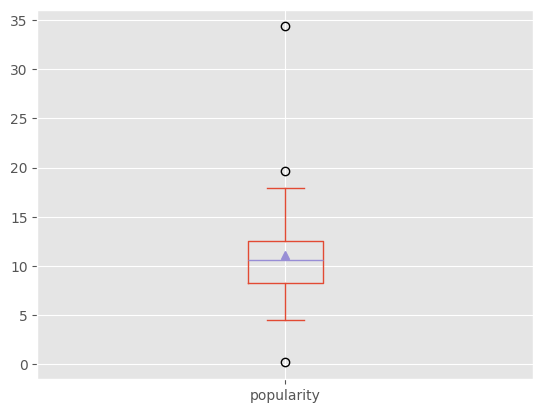

In [352]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'popularity', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

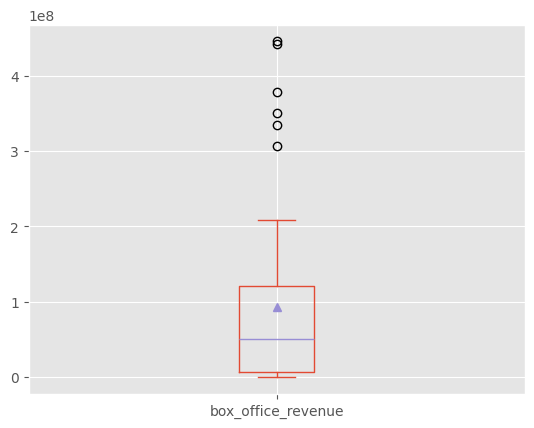

In [353]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'box_office_revenue', showmeans = True)
plt.show()

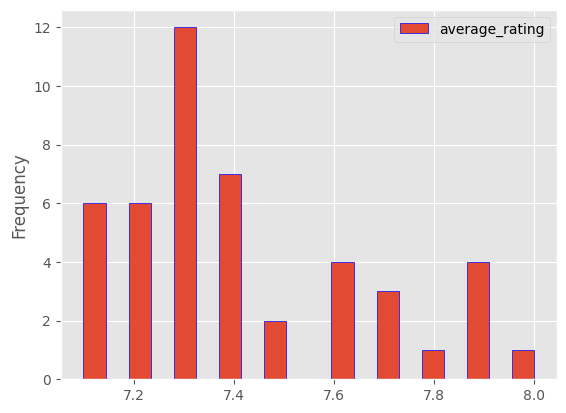

In [354]:
# histogram: frequency of data (with Pandas)
plt.figure()
df['average_rating'].plot.hist(bins = 20, edgecolor = 'blue', legend = True)
plt.show()

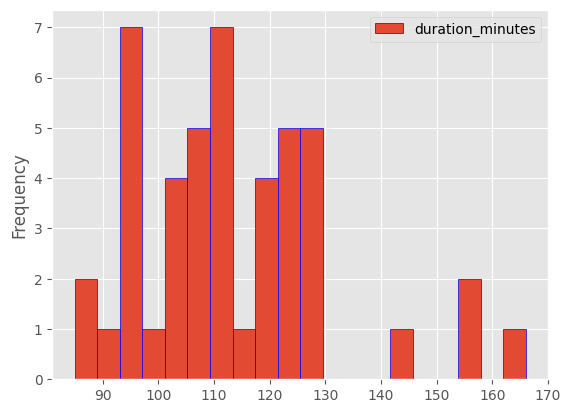

In [355]:
# histogram: frequency of data (with Pandas)
plt.figure()
df['duration_minutes'].plot.hist(bins = 20, edgecolor = 'blue', legend = True)
plt.show()

In [356]:
# create a pivot table
pivot_sum_film_revenue = pd.pivot_table(df, values = ['box_office_revenue'], index = ['production_company'], 
    aggfunc = 'sum', fill_value = 0)
pivot_count_film_revenue

,box_office_revenue
production_company,
Brownstone Productions,115350426
Castel Film Studio,53447
Constantin Film,4439431
Cosmo-Films,13624522
Double Feature Films,573335
EM Media,484592
Electric City Entertainment,5879736
Film4,864659
Fox 2000 Pictures,370180115


In [357]:
# create a pivot table
pivot_count_directors_company = pd.pivot_table(df, values = ['director'], index = ['production_company'], 
    aggfunc = 'count', fill_value = 0)
pivot_count_directors_company

,director
production_company,
Brownstone Productions,1
Castel Film Studio,1
Constantin Film,1
Cosmo-Films,1
Double Feature Films,1
EM Media,1
Electric City Entertainment,1
Film4,1
Fox 2000 Pictures,2


In [358]:
# create a pivot table
pivot_count_writers_company = pd.pivot_table(df, values = ['writer'], index = ['production_company'], 
    aggfunc = 'count', fill_value = 0)
pivot_count_writers_company

,writer
production_company,
Brownstone Productions,1
Castel Film Studio,1
Constantin Film,1
Cosmo-Films,1
Double Feature Films,1
EM Media,1
Electric City Entertainment,1
Film4,1
Fox 2000 Pictures,2


In [359]:
# create a pivot table
pivot_count_actor1_film = pd.pivot_table(df, values = ['title'], index = ['actor1'], 
    aggfunc = 'count', fill_value = 0)
pivot_count_actor1_film

,title
actor1,
Alan Rickman,1
Anna Kendrick,1
Blake Lively,1
Bruce Willis,1
Cate Blanchett,2
Claire Danes,1
Craig Roberts,1
Dev Patel,1
Diego Luna,1


In [360]:
# correlation matrix (how strongly are variables related to each other)
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,duration_minutes,year_released,popularity,average_rating,production_cost,box_office_revenue
duration_minutes,1.000000,-0.018342,0.269646,0.163631,0.358871,0.547399
year_released,-0.018342,1.000000,0.099733,0.327916,-0.142110,-0.022589
popularity,0.269646,0.099733,1.000000,0.316513,0.166277,0.528198
average_rating,0.163631,0.327916,0.316513,1.000000,-0.042051,0.078337
production_cost,0.358871,-0.142110,0.166277,-0.042051,1.000000,0.257332
box_office_revenue,0.547399,-0.022589,0.528198,0.078337,0.257332,1.000000


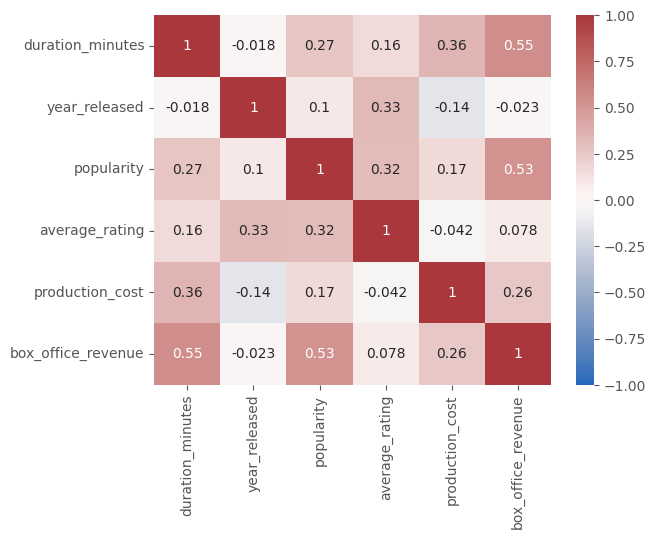

In [361]:
# visualize correlations in a heatmap matrix
plt.figure()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = +1, cmap ="vlag")
plt.show()

#Creating the X and Y dataset

In [362]:
oszlopok_torolni = ['imdb_id', 'title', 'genres', 'actor1', 'actor2','actor3','director','writer','production_company']
df1 = df.drop(columns=oszlopok_torolni)
df2 = df1.dropna()
df2.head()

,duration_minutes,year_released,popularity,average_rating,production_cost,box_office_revenue
0,106,2007,8.025118,7.1,12000000.0,11293663
1,95,2009,16.376657,7.2,7500000.0,60722734
2,100,2011,11.440948,7.3,15000000.0,133432856
3,94,2012,8.692433,7.6,16000000.0,68263166
4,89,2010,10.279685,7.4,14000000.0,1755212


In [363]:
# predictor variables (features) - as a numpy array
df_x = df2.drop(['average_rating'], axis = 1)

x = np.array(df_x)


In [364]:
# outcome variable (label) - as a numpy array
y = np.array(df2['average_rating'])

In [365]:
# shape of the array
# we don't need to reshape, it's already 2D
x.shape

(38, 5)

#Split the datasets to TRAIN and TEST sets

In [366]:
# allocate n % of data randomly for training, and the remaining for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

#Building and training the model

In [367]:
# build the model
model = LinearRegression()

In [368]:
# train the model
model.fit(x_train, y_train)

LinearRegression()

In [369]:
# the model's accuracy score: R squared (coefficient of determination)
# how many % of the outcome variable's variance (deviance from the Mean) can be explained by the features
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 2.59%


#The regression aquation

In [370]:
# the constant in the regression equation (the intercept on the y axis)
b0 = model.intercept_

In [371]:
# coefficients (multipliers) in the regression equation
# the slope of the line
bn = model.coef_
bn

array([ 5.14121452e-03,  2.11437308e-02,  1.11446111e-02, -5.34384362e-09,
        4.88103124e-10])

In [372]:
# new values to predict
# duration_minute, year_released, popularíty, production_cost,box_office_revenue
x_new = np.array([ [120, 2016, 15.2, 11800000,144465000] ])
x_new

array([[1.20000e+02, 2.01600e+03, 1.52000e+01, 1.18000e+07, 1.44465e+08]])

#Prediction on teszt dataset

In [373]:
# make the predictions with the model
y_pred = model.predict(x_test)
y_pred.round(2)

array([7.52, 7.31, 7.4 , 7.39, 7.45, 7.24, 7.47, 7.4 ])

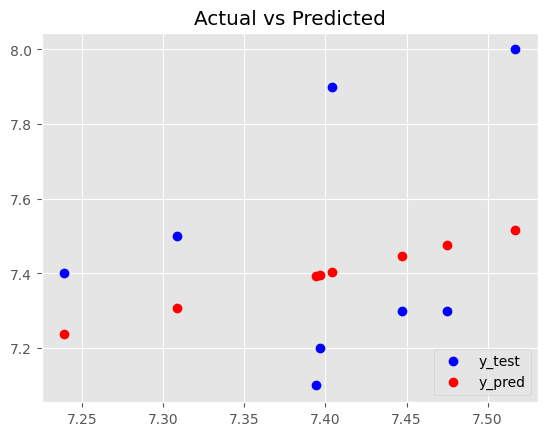

In [374]:
# compare actual vs predicted data visually
plt.figure()
plt.plot(y_pred, y_test, 'bo')
plt.plot(y_pred, y_pred, 'ro')

plt.title('Actual vs Predicted')
plt.legend(['y_test', 'y_pred'], loc = 'lower right')
plt.show()

In [375]:
# calculate accuracy of the model
# get the root mean squared error (RMSE), the standard deviation of the residuals
# the lower RMSE is, the better the model fits
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.2999164064193263

#Predictions on new values

In [376]:
# new values to predict
# Average price per trip, Number of individuals, Average income of riders, Average parking rates
x_new = np.array([ [120, 2016, 15.2, 11800000,144465000] ])
x_new

array([[1.20000e+02, 2.01600e+03, 1.52000e+01, 1.18000e+07, 1.44465e+08]])

In [377]:
# make the predictions with the model
y_pred = model.predict(x_new)
y_pred.round(2)

array([7.66])

In [378]:
#Final section

In [379]:
# beep sound
frequency = 840  # Hz
duration = 1000  # milliseconds

winsound.Beep(frequency, duration)

In [381]:
print('Statistical analysis and prediction has been made!')

Statistical analysis and prediction has been made!
